In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
all_data = pd.merge(mouse_data, trial_data, on="Mouse ID")

# Display the data table for preview
all_data.head(10)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [32]:
# Store the Mean Tumor Volume Data, Grouped by Drug and Timepoint 
mean_tumor_data_df = all_data[["Drug", "Timepoint", "Tumor Volume (mm3)"]]
mean_tumor_data_df = pd.DataFrame(mean_tumor_data_df.groupby(by=['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean())
# Preview DataFrame of the mean tumor data dataframe
mean_tumor_data_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [35]:
# Store the Standard Error of Tumor Volumes, Grouped by Drug and Timepoint
mean_tumor_data['Volume SEM'] = mean_tumor_data['Tumor Volume (mm3)'].sem()
mean_tumor_data_df['Volume SEM'] = mean_tumor_data_df['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
# Preview DataFrame
mean_tumor_data_df.head()


Tumor Volume (mm3)  Volume SEM
Drug      Timepoint                                
Capomulin 0                   45.000000    0.898067
          5                   44.266086    0.898067
          10                  43.084291    0.898067
          15                  42.064317    0.898067
          20                  40.716325    0.898067

In [36]:
# Minor Data Munging to Re-Format the Data Frames
# PIVOT TABLE PIVOT TABLE PIVOT TABLE
drug_sf = pd.pivot_table(data=mean_tumor_data_df, index='Timepoint', columns='Drug', values='Tumor Volume (mm3)',
                               aggfunc = np.mean)

# Preview that Reformatting worked
drug_sf.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [40]:
drug_errors_sf = pd.pivot_table(data=mean_tumor_data_df, index='Timepoint', columns='Drug', values='Volume SEM',
                               aggfunc = np.mean)
drug_errors_sf

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
5,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
10,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
15,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
20,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
25,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
30,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
35,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067
40,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067,0.898067


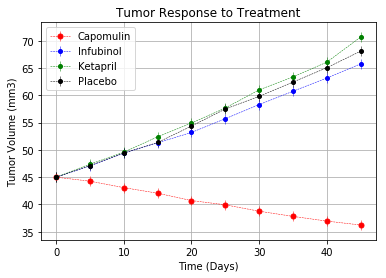

In [41]:
# Generate the Plot (with Error Bars)
plt.errorbar(drug_sf.index, drug_sf['Capomulin'], yerr=drug_errors_sf['Capomulin'],
            color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(drug_sf.index, drug_sf['Infubinol'], yerr=drug_errors_sf['Infubinol'], 
             color='b', marker='o', markersize=4, linestyle='--', linewidth=0.5)
plt.errorbar(drug_sf.index, drug_sf['Ketapril'], yerr=drug_errors_sf['Ketapril'], 
             color='g', marker='o', markersize=4, linestyle='--', linewidth=0.5)
plt.errorbar(drug_sf.index, drug_sf['Placebo'], yerr=drug_errors_sf['Placebo'], 
             color='black', marker='o', markersize=4, linestyle='--', linewidth=0.5)

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="upper left")
plt.grid()
# Save the Figure
plt.savefig("error_bars.png")
plt.show()

In [ ]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [42]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_site_data = all_data.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
msd_df = pd.DataFrame(meta_site_data)
# Preview DataFrame
msd_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [43]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
msd_error_df = pd.DataFrame(msd_df.groupby(by=['Drug', 'Timepoint'])['Metastatic Sites'].mean())
msd_error_df['Metastatic Sites SEM'] = msd_error_df['Metastatic Sites'].sem()
msd_error_df.head()

Metastatic Sites  Metastatic Sites SEM
Drug      Timepoint                                        
Capomulin 0                  0.000000              0.090044
          5                  0.160000              0.090044
          10                 0.320000              0.090044
          15                 0.375000              0.090044
          20                 0.652174              0.090044

In [44]:
# Minor Data Munging to Re-Format the Data Frames
# PIVOT TABLE PIVOT TABLE PIVOT TABLE
meta_pivot = pd.pivot_table(data=msd_df, index='Timepoint', columns='Drug', values='Metastatic Sites',
                               aggfunc = np.mean)
# Preview that Reformatting worked
meta_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [45]:
# PIVOT TABLE PIVOT TABLE PIVOT TABLE
meta_error_pivot = pd.pivot_table(data=msd_error_df, index='Timepoint', columns='Drug', values='Metastatic Sites SEM', 
                                  aggfunc = np.mean)
meta_error_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
5,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
10,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
15,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044
20,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044,0.090044


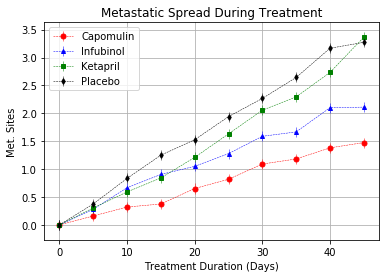

In [46]:
# Generate the Plot (with Error Bars)
plt.errorbar(meta_pivot.index, meta_pivot['Capomulin'], yerr=meta_error_pivot['Capomulin'],
            color='r', marker='o', markersize=5, linestyle='--', linewidth=0.5)
plt.errorbar(meta_pivot.index, meta_pivot['Infubinol'], yerr=meta_error_pivot['Infubinol'], 
             color='b', marker='^', markersize=4, linestyle='--', linewidth=0.5)
plt.errorbar(meta_pivot.index, meta_pivot['Ketapril'], yerr=meta_error_pivot['Ketapril'], 
             color='g', marker='s', markersize=4, linestyle='--', linewidth=0.5)
plt.errorbar(meta_pivot.index, meta_pivot['Placebo'], yerr=meta_error_pivot['Placebo'], 
             color='black', marker='d', markersize=4, linestyle='--', linewidth=0.5)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.legend(loc="upper left")
plt.grid()
# Save the Figure
plt.savefig("plot_with_errors.png")
# Show the Figure
plt.show()

## Survival Rates

In [3]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = all_data.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
# Convert to DataFrame
mice_df = pd.DataFrame(mice_count)
mice_df.rename(columns={'Mouse ID':'Mouse Count'})
# Preview DataFrame
mice_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [4]:
# Minor Data Munging to Re-Format the Data Frames
# PIVOT TABLE PIVOT TABLE PIVOT TABLE
mice_pivot = pd.pivot_table(data=mice_df, index='Timepoint', columns='Drug', values='Mouse ID', 
                                  aggfunc = np.mean)
# Preview the Data Frame
mice_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [ ]:
# change the info to percentages

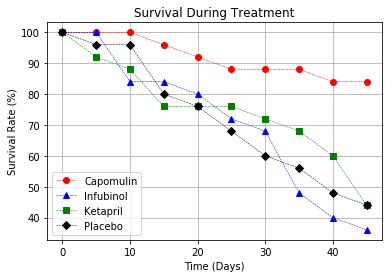

In [5]:
# Generate the Plot (Accounting for percentages)
plt.plot((mice_pivot['Capomulin']/25)*100, marker='o',linestyle='--', linewidth=0.5, color='r')
plt.plot((mice_pivot['Infubinol']/25)*100, marker='^',linestyle='--', linewidth=0.5, color='b')
plt.plot((mice_pivot['Ketapril']/25)*100, marker='s',linestyle='--', linewidth=0.5, color='g')
plt.plot((mice_pivot['Placebo']/25)*100, marker='D',linestyle='--', linewidth=0.5, color='black')

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="lower left")
plt.grid()
# Save the Figure
plt.savefig("account_for_percentages")
# Show the Figure
plt.show()

## Summary Bar Graph

In [7]:
# Calculate the percent changes for each drug
# Display the data to confirm
percent_change = mice_count.pct_change()
percent_change = percent_change.dropna()
#percent_change = percent_change["Mouse ID"].mean()
percent_change.head(10)
capomulin = percent_change["Drug"]["Capomulin"].mean()
placebo = percent_change["Drug"]["Placebo"].mean()
infubinol = percent_change["Drug"]["Infubinol"].mean()
ketapril = percent_change["Drug"]["Ketapril"].mean()

KeyError: 'Drug'

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 
x = np.arange(4)
plt.bar(x, per_changes, bottom=-30, tick_label=())
plt.grid()
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xticks(x, ("Capomulin", "Infubinol", "Ketapril", "Placebo"))

# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
plt.savefig("tumor_change")

# Show the Figure
plt.show()

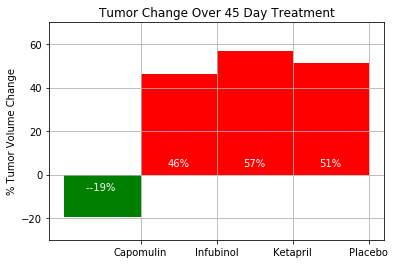